# StructN2V - 2D Example for Convallaria data

In [1]:
# We import all our dependencies.
from n2v.models import N2V
import numpy as np
from matplotlib import pyplot as plt
from tifffile import imread
from csbdeep.io import save_tiff_imagej_compatible

Using TensorFlow backend.


## Load the Network

In [2]:
# A previously trained model is loaded by creating a new N2V-object without providing a 'config'.
model_name = 'n2v_2D'
basedir = 'models'
model = N2V(config=None, name=model_name, basedir=basedir)

Loading network weights from 'weights_best.h5'.


In [3]:
# Load model weights from final epoch instead of default weights with best validation score.
# model.load_weights('weights_last.h5')

## Prediction
Here we will simply use the same data as during training and denoise it using our network.

In [4]:
model.config.axes='YXC'

In [5]:
# We load the data we want to process.
input_train = imread('data/flower.tif')[...,None]

# Here we process the data.
# The parameter 'n_tiles' can be used if images are to big for the GPU memory.
# If we do not provide the n_tiles' parameter the system will automatically try to find an appropriate tiling.
# This can take longer.
pred_train = []
for _x in input_train[:2]:
    _yp = model.predict(_x, axes='YXC', n_tiles=(1,1,1))
    pred_train.append(_yp)
pred_train = np.array(pred_train)

# We load and process the data we previously used for validation.
# input_val = imread('data/validation.tif')
# pred_val = model.predict(input_val, axes='TYX')

The input image is of type uint16 and will be casted to float32 for prediction.
The input image is of type uint16 and will be casted to float32 for prediction.


### Show results on training data...

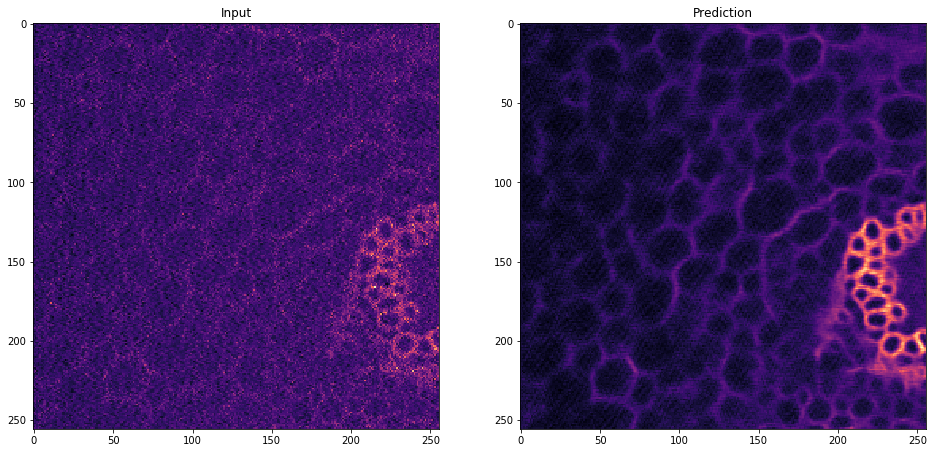

In [6]:
# Let's look at the results.
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.imshow(input_train[0,:256,:256,0],cmap="magma")
plt.title('Input');
plt.subplot(1,2,2)
plt.imshow(pred_train[0,:256,:256,0],cmap="magma")
plt.title('Prediction');

# Horizontal stripes may appear, matching the pattern of the mask used during training.
# Try training for longer time and see if they go away!

### Show results on validation data...

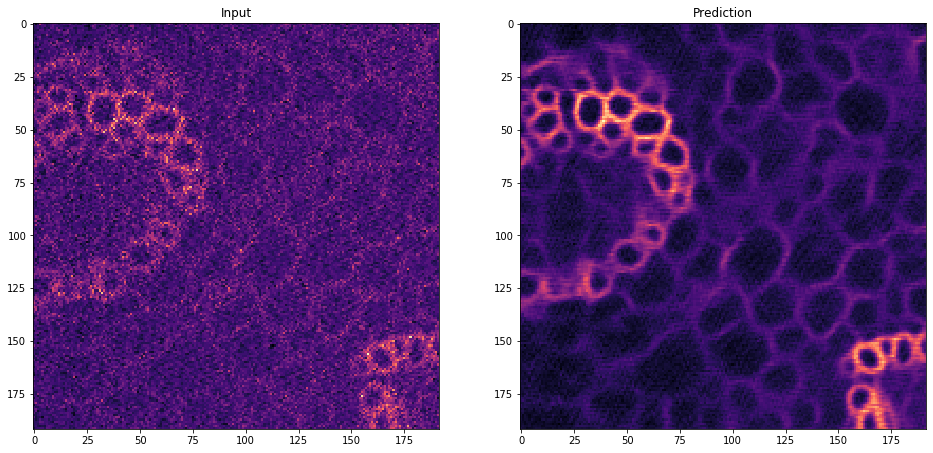

In [7]:
# Let's look at the results.
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.imshow(input_train[0,-192:,:192,0],cmap="magma")
plt.title('Input');
plt.subplot(1,2,2)
plt.imshow(pred_train[0,-192:,:192,0],cmap="magma")
plt.title('Prediction');

## Save Results

In [8]:
save_tiff_imagej_compatible('pred.tif', pred_train, axes='TYXC')